# Homework 4 Solution

**MECH.5130: Theory of Finite Element Analysis**

Michael N. Olaya

## Problem 1

![key_funcs](../figs/hw4_funcs.png)
![bubble_charts](../figs/hw4_bubble_charts.png)

## Problem 2

### compute_strain_energy_density

```Python
# Input: 
    # sigma: ndarray (n x m x 3 x 1)
    # eps: ndarray (n x m x 3 x 1)
# Compute psi = 1/2[eps]^T[sigma]
# Output: 
    # ndarray (n x m x 1 x 1)
```

### plot_strain_energy_density

```Python
# Input: 
    # psi: ndarray (n x m x 1 x 1)
    # grid: ndarray (n x m x 2 x 1)
# Plot strain energy density (psi) for all points on the grid of element coordinates
# Output: 
    # Figure
```

### make_ip_grid

```Python
# Input: 
    # num_pts: int
# Get locations of integration points based on requested number (num_pts)
# Get weights of integration points based on requested number (num_pts)
# Create a grid of points in 2D
# Create a grid of weights in 2D, where each point is pre-multiplied (i.e., w_i*w_j)
# Reshape grids for vectorization
# Output: 
    # ndarray (num_pts x num_pts x 2 x 1)
    # ndarray (num_pts x num_pts x 1 x 1)
```

### compute_k

```Python
# Input: 
    # ip_grid: ndarray (num_pts x num_pts x 2 x 1)
    # w_ij: ndarray (num_pts x num_pts x 1 x 1)
    # D: int
    # thickness: int
# Compute [dN]
# Compute [J]
# Compute [B]
# Compute det(J) at the integration points
# Compute [B]^T
# Compute [k] = thickness*w_ij*[B]^T[D][B]*det(J)
# Output: 
    # ndarray (2*nnodes x 2*nnodes)
```

## Problem 3

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import mfe.utils
import mfe.elem_lib
import mfe.baseclasses
import mfe.gauss
import mfe.plot

plt.style.use('ggplot')
plt.style.use('../../mfe/def_plt_style.mplstyle')

In [10]:
# Make elements and materials
ELEMENTS = {
    'linear': {
        'elem': mfe.elem_lib.Linear2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([12, 1]), 
                np.array([15, 8]), 
                np.array([-1, 10])]
        ),
        'q': np.array([0, 0, 0.1, -0.1, 0.1, 0.1, -0.1, 0.1])
    },
    'quad': {
        'elem': mfe.elem_lib.Quadratic2D.from_element_coords(
            [
                np.array([0, 0]), 
                np.array([6, -0.5]), 
                np.array([12, -1]),
                np.array([11, 3]),
                np.array([15, 8]),
                np.array([6, 11]),
                np.array([-1, 10]),
                np.array([2, 5]),
            ]
        ),
        'q': np.array([0, 0, -0.1, 0.1, -0.2, 0.3, -0.2, 0.3, -0.2, 0.3, -0.1, 0.1, 0.0, -0.1, 0.0, 0.0])
    },
}
MATERIALS = {
    'aluminum': mfe.baseclasses.Material(E=70000, nu=0.33)
}
THICKNESS = 1.3

In [11]:
# Set the element and material stiffness, then compute stress and strain
elem = ELEMENTS['linear']['elem']
q = ELEMENTS['linear']['q']
D = MATERIALS['aluminum'].D_isotropic_plane_strain()
natural_grid = mfe.utils.make_natural_grid()
dN = elem.compute_dN(natural_grid)
J = elem.compute_J(dN)
B = elem.compute_B(dN, J)
eps = elem.compute_strain(B, q)
sigma = elem.compute_stress(D, eps)

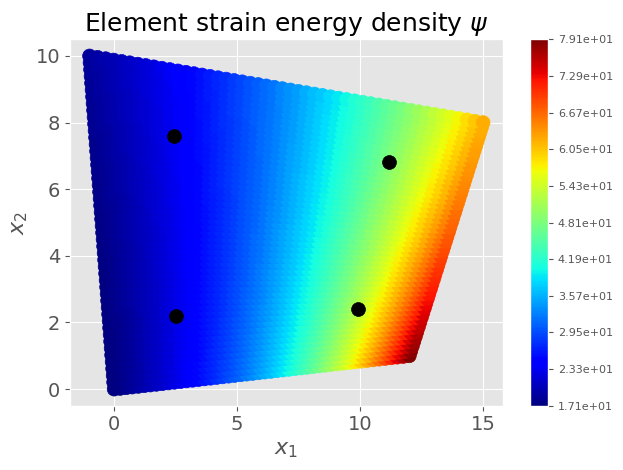

In [12]:
# Compute the strain energy density and plot
x_elem = elem.map_to_element(elem.x_element, natural_grid)
psi = elem.compute_strain_energy_density(sigma, eps)
fig, ax = mfe.plot.plot_element_strain_energy_density(psi, x_elem, method='scatter', coord_sys='element')

# Interpolate to map integration point positions in natural to local element coordinates
x_itg_pts = elem.map_to_element(elem.x_element, elem.integration_points.x_natural)

# Plot position of integration points required for exact solution
ax.scatter(x_itg_pts[:, :, 0, 0], x_itg_pts[:, :, 1, 0], color='k')

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Element stiffness matrix $\\mathbf{k}$'}, xlabel='$j$-index', ylabel='$i$-index'>)

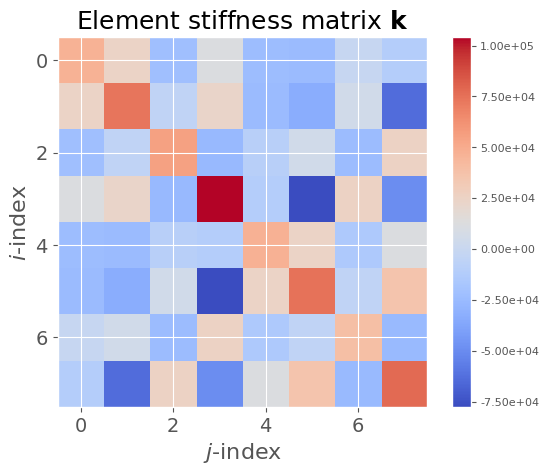

In [13]:
# Compute the element stiffness matrix
k = elem.compute_k(D, THICKNESS)
mfe.plot.plot_element_stiffness(k)

## Problem 4

In [14]:
# Set the element and material stiffness, then compute stress and strain
elem = ELEMENTS['quad']['elem']
q = ELEMENTS['quad']['q']
D = MATERIALS['aluminum'].D_isotropic_plane_strain()
natural_grid = mfe.utils.make_natural_grid()
dN = elem.compute_dN(natural_grid)
J = elem.compute_J(dN)
B = elem.compute_B(dN, J)
eps = elem.compute_strain(B, q)
sigma = elem.compute_stress(D, eps)

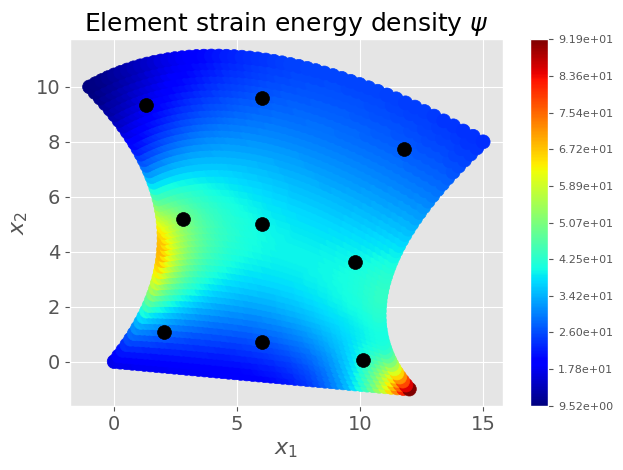

In [15]:
# Compute the strain energy density and plot
x_elem = elem.map_to_element(elem.x_element, natural_grid)
psi = elem.compute_strain_energy_density(sigma, eps)
fig, ax = mfe.plot.plot_element_strain_energy_density(psi, x_elem, method='scatter', coord_sys='element')

# Interpolate to map integration point positions in natural to local element coordinates
x_itg_pts = elem.map_to_element(elem.x_element, elem.integration_points.x_natural)

# Plot position of integration points required for exact solution
ax.scatter(x_itg_pts[:, :, 0, 0], x_itg_pts[:, :, 1, 0], color='k')

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Element stiffness matrix $\\mathbf{k}$'}, xlabel='$j$-index', ylabel='$i$-index'>)

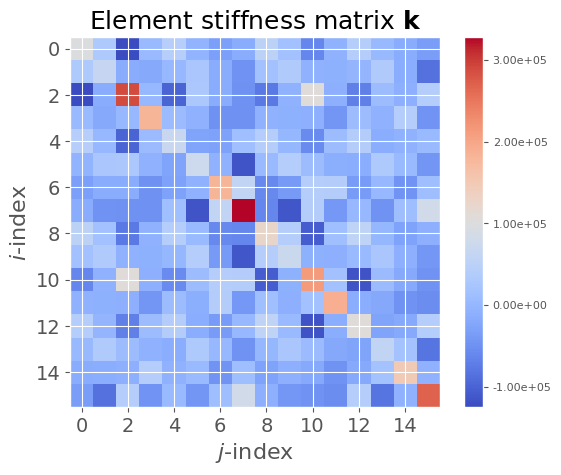

In [16]:
# Compute the element stiffness matrix and plot
k = elem.compute_k(D, THICKNESS)
mfe.plot.plot_element_stiffness(k)